データの確認

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('hepatisis_origin.csv')
# test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape}')# Test shape: {test.shape}')

# 先頭行の出力
train.head()
# test.head()

Train shape: (80, 20)


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95,28,4.0,75,False,live
1,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78,30,4.4,85,False,live
2,32,female,True,True,True,False,False,True,True,False,True,False,False,1.0,59,249,3.7,54,False,live
3,41,female,True,True,True,False,False,True,True,False,False,False,False,0.9,81,60,3.9,52,False,live
4,30,female,True,False,True,False,False,True,True,False,False,False,False,2.2,57,144,4.9,78,False,live


統計量の確認

In [2]:
train.describe(include='all')
# test.describe(include='all')

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
count,80.00000,80,80,80,80,80,80,80,80,80,80,80,80,80.000000,80.000000,80.000000,80.000000,80.000000,80,80
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,female,True,False,True,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,live
freq,NaN,69,42,59,52,49,68,67,42,65,55,68,70,NaN,NaN,NaN,NaN,NaN,47,67
mean,40.66250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.221250,102.912500,82.025000,3.843750,62.512500,NaN,NaN
std,11.28003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875213,53.684779,71.599974,0.576292,23.427774,NaN,NaN
min,20.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,26.000000,14.000000,2.100000,0.000000,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,68.250000,30.750000,3.500000,46.000000,NaN,NaN
50%,38.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,85.000000,56.500000,4.000000,62.000000,NaN,NaN
75%,49.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,133.500000,102.750000,4.200000,77.250000,NaN,NaN


相関関係の確認

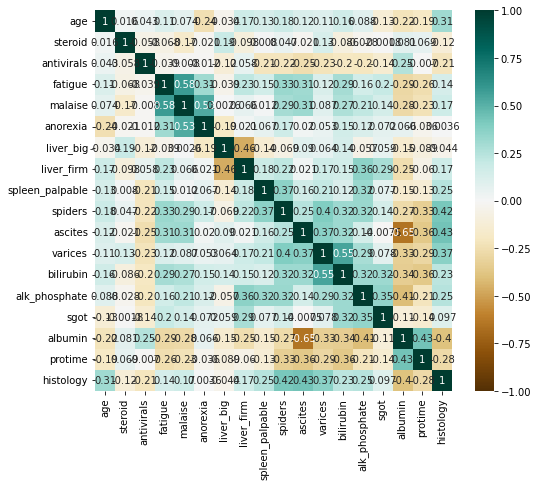

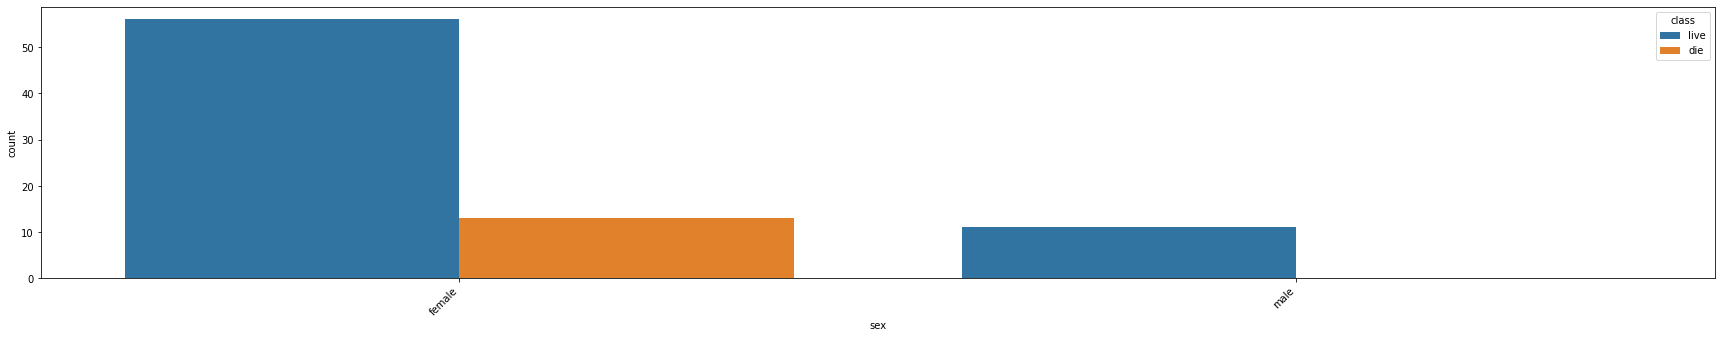

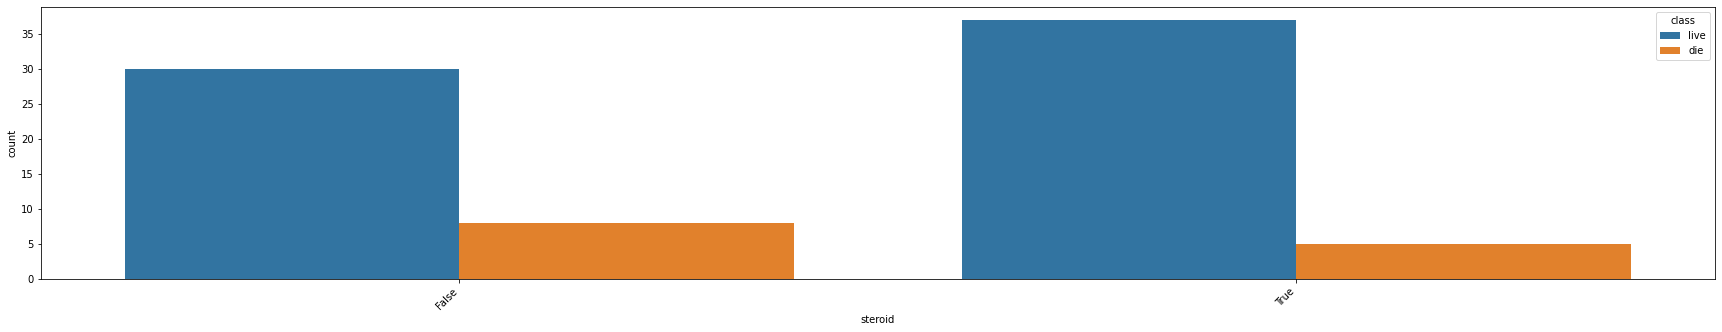

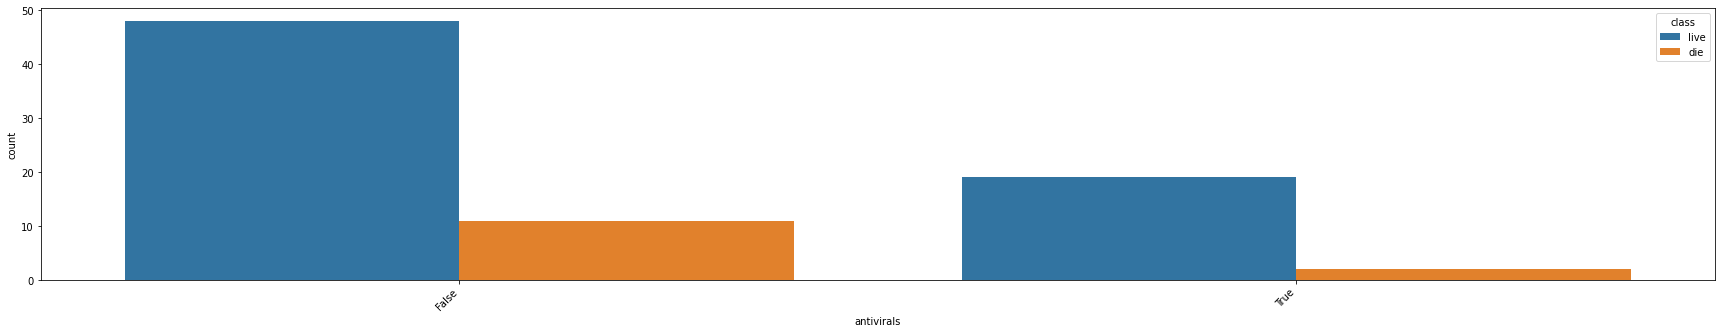

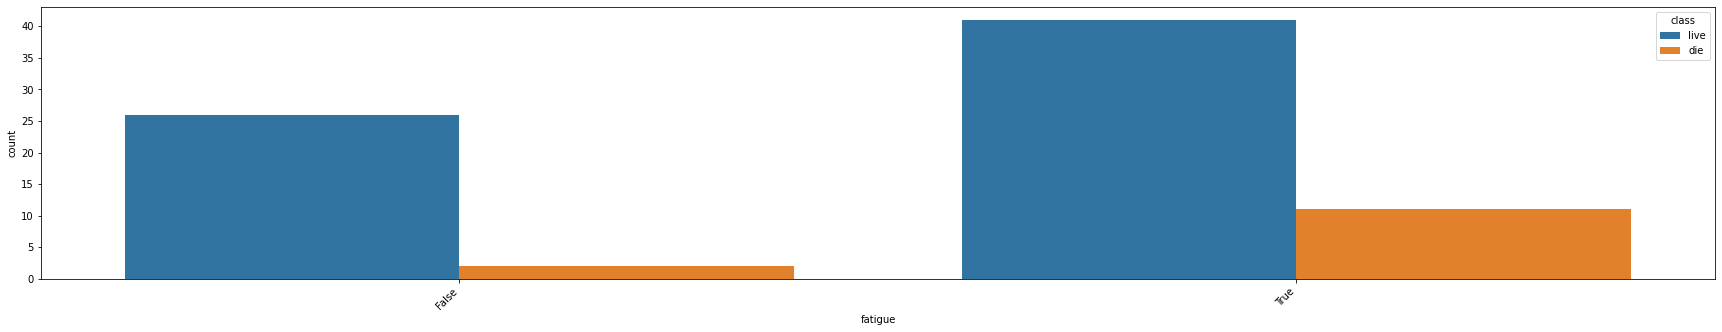

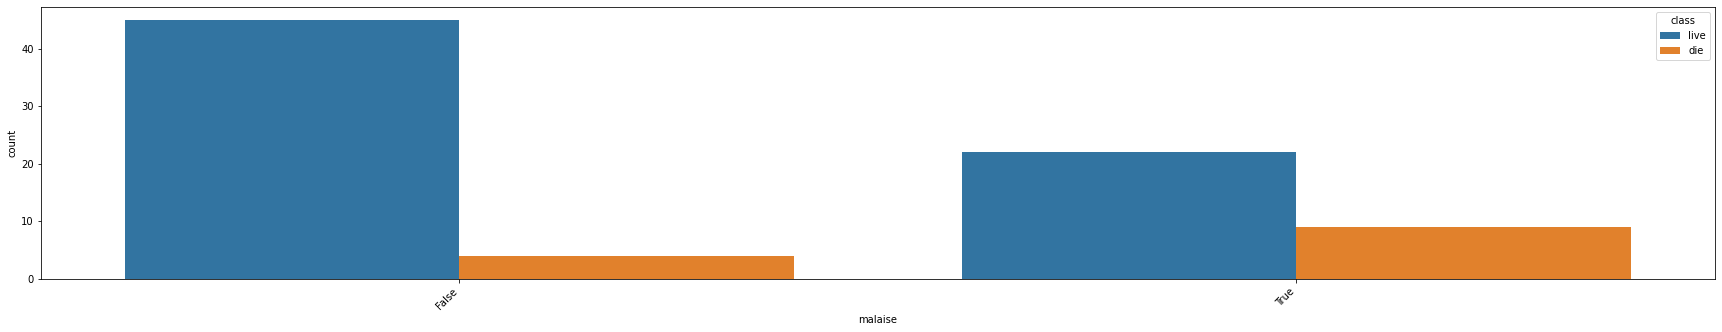

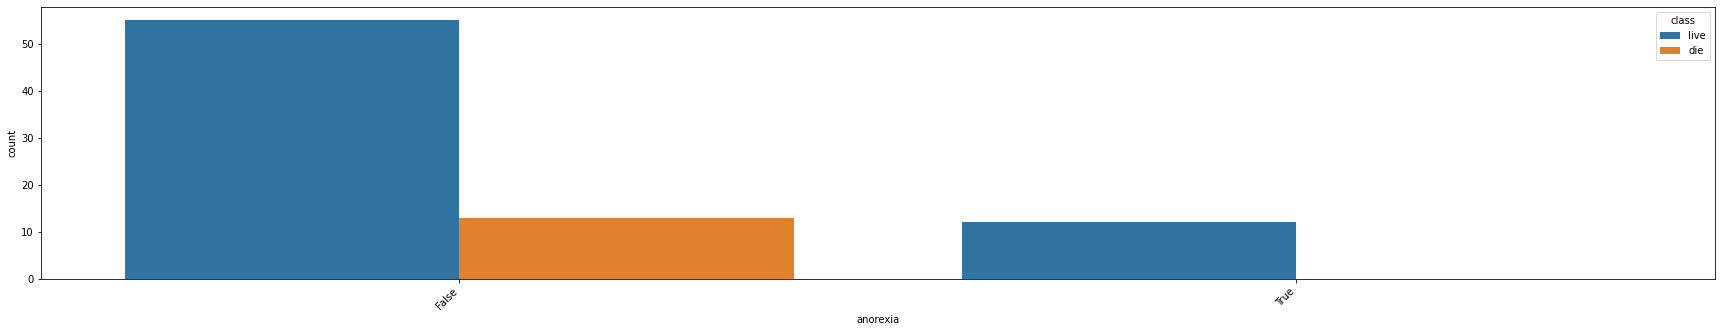

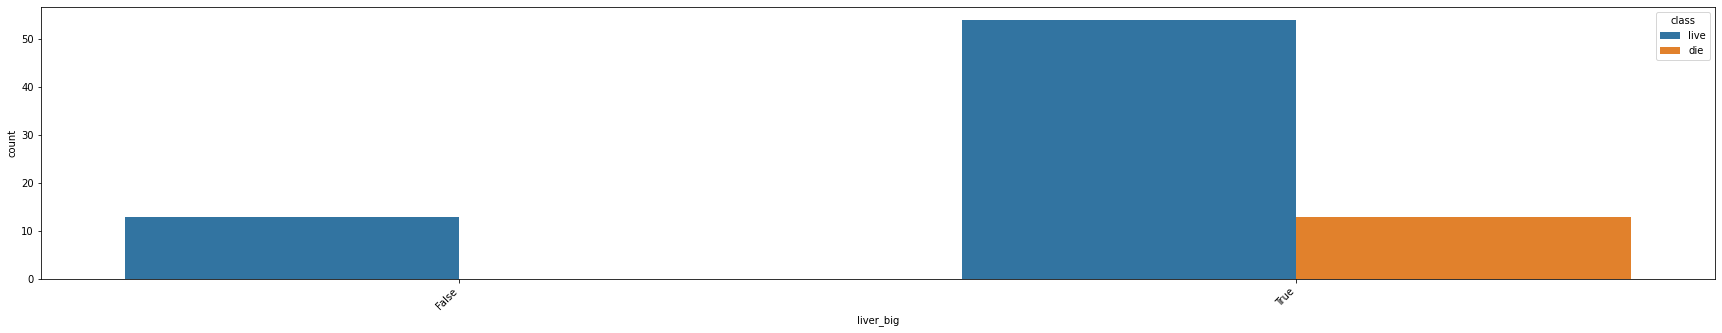

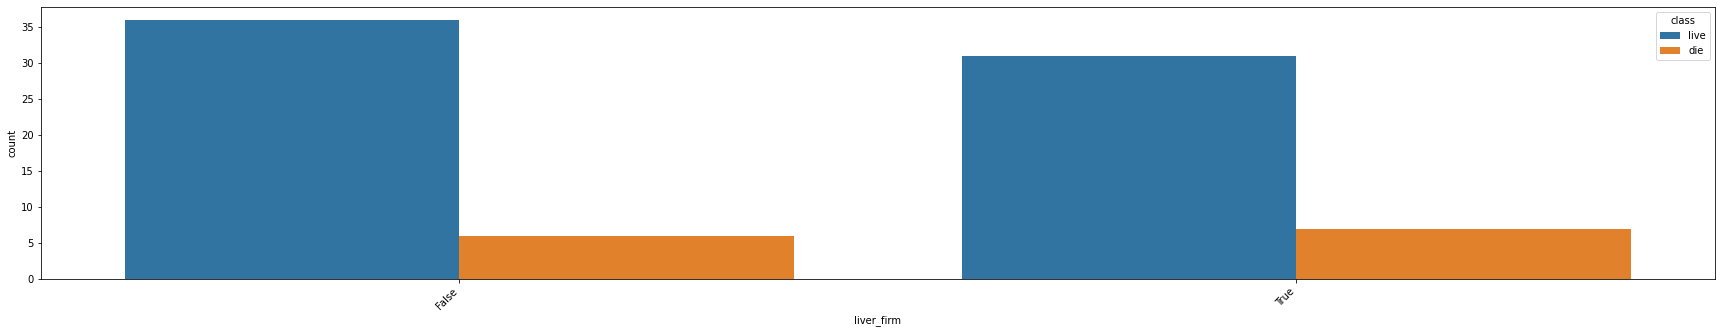

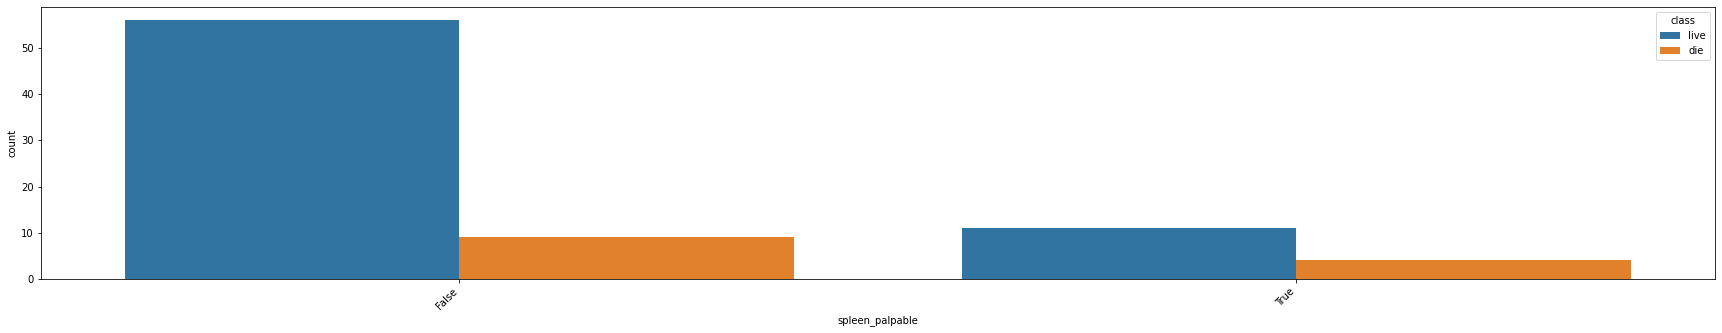

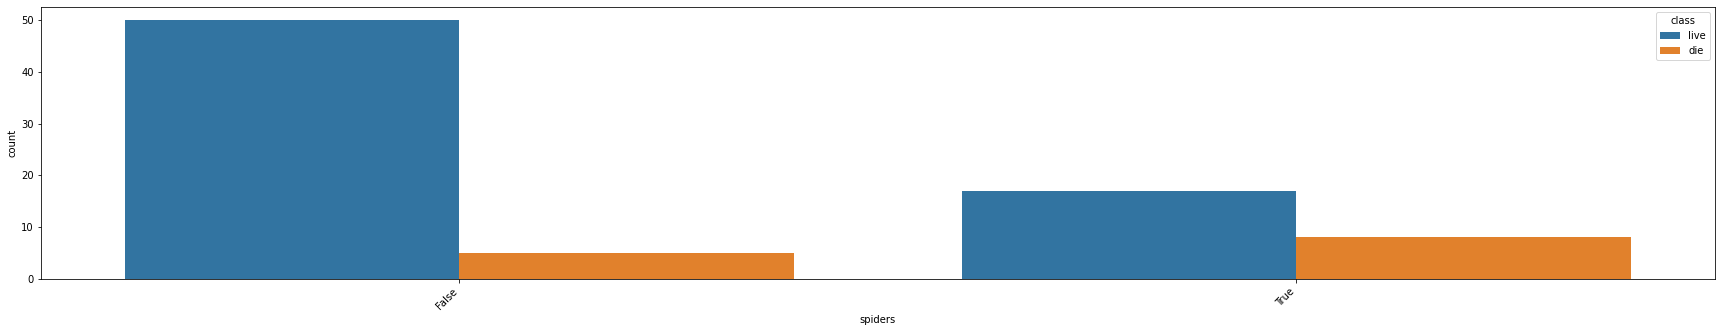

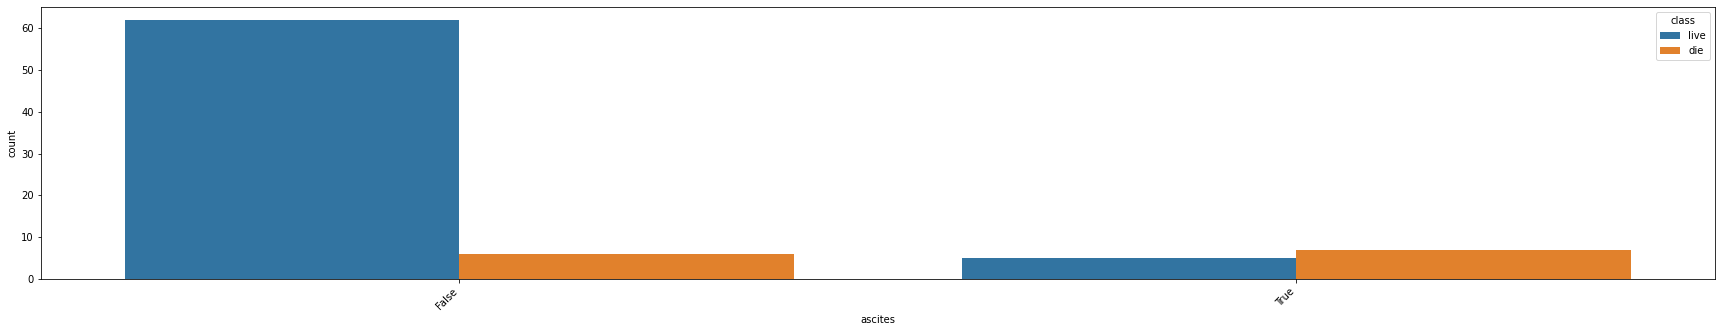

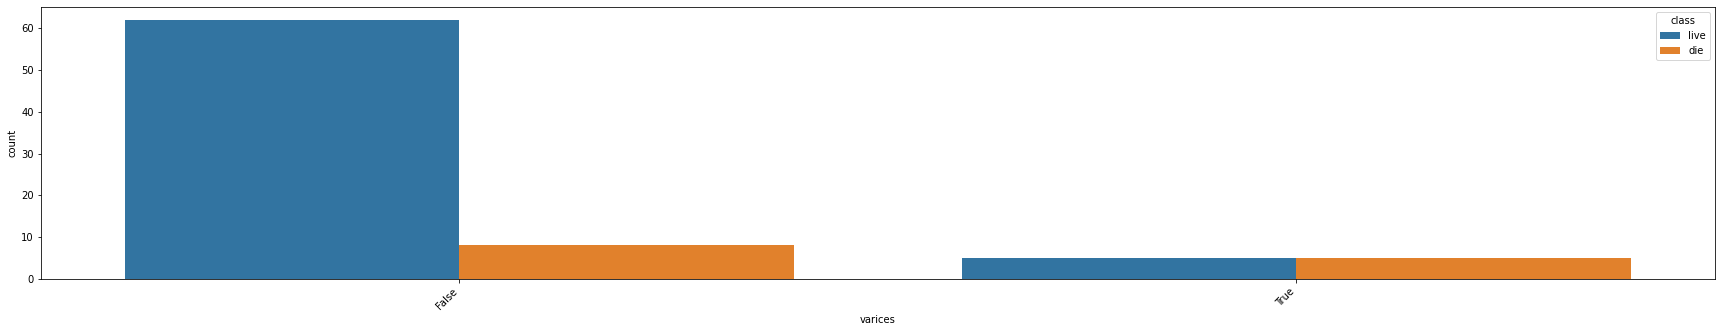

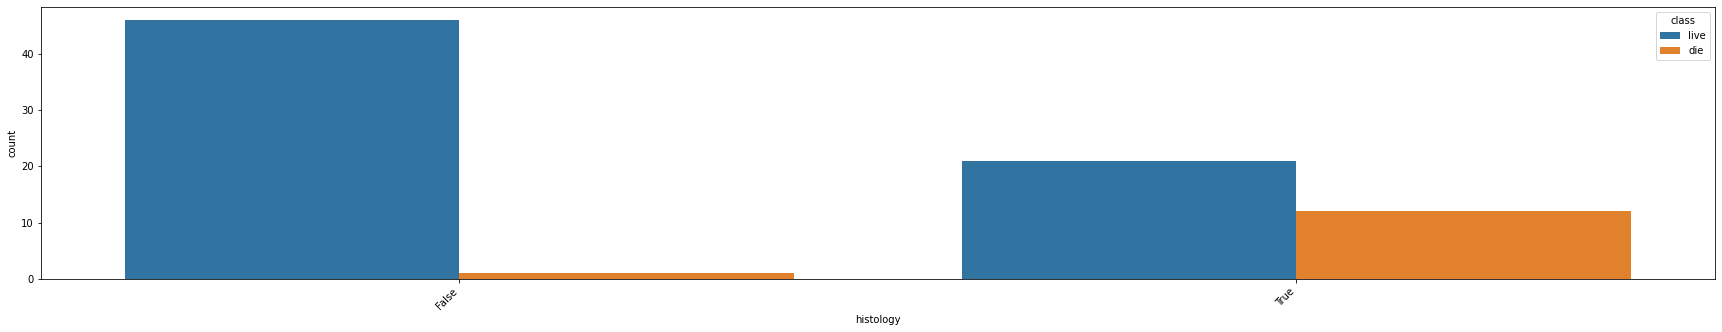

In [3]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

#カテゴリ変数とラベルの関係
categorical_feature = ['sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','histology']
for feature_name in categorical_feature:
    fig = plt.figure(figsize=(30,5))
    plt.xticks(rotation=45, ha="right")
    ax = sns.countplot(x=feature_name, hue='class', data=train)
plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [4]:
print(f'Null of Train: {(train.isnull().sum())}')
# print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64


前処理

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# # カテゴリカル変数の定義
categorical_feature = ['sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','histology']
# # 特徴量エンジニアリング
train = train.dropna(subset=['steroid','fatigue','malaise','anorexia','spleen_palpable','spiders','ascites','varices']) #カラムに欠損値があれば行を消す
train['bilirubin'].fillna(train['bilirubin'].median(), inplace=True) #　中央値で埋める(量的変数のみ)
train['alk_phosphate'].fillna(train['alk_phosphate'].median(), inplace=True) #　中央値で埋める(量的変数のみ)
train['protime'].fillna(train['protime'].median(), inplace=True) #　中央値で埋める(量的変数のみ)
train['sgot'].fillna(train['sgot'].median(), inplace=True) #　中央値で埋める(量的変数のみ)
train['albumin'].fillna(train['albumin'].median(), inplace=True) #　中央値で埋める(量的変数のみ)
# train.drop(columns=['protime'])

df = train
oe = OrdinalEncoder()

# データの正規化
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df = df.rename(columns={'class': 'target'})

df['target'] = df['target'].replace({'die': 0, 'live': 1})
df_target = df['target']
df_without_target = df.drop(columns=['target'])

oe = OrdinalEncoder()
df_without_target[categorical_feature] = oe.fit_transform(df_without_target[categorical_feature]).astype(int)

# Fit and transform the data without the target column
# df_without_target_scaled = pd.DataFrame(scaler.fit_transform(df_without_target), columns = df_without_target.columns)

#標準化した場合
from sklearn import preprocessing
df_without_target_scaled = pd.DataFrame(preprocessing.scale(df_without_target), columns=df_without_target.columns)
df_without_target['target'] = df['target']
df = df_without_target

# Combine the target column and the scaled data
df_scaled = pd.concat([df_without_target_scaled, df_target], axis=1)

df_scaled.to_csv('hepa.csv', index=False)